<a href="https://colab.research.google.com/github/shanOnline99/Big-Mart-Sale-Prediction/blob/main/Big_Mart_Sale_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RATHNAYAKA R.M.D.T.
# 2019/E/107
# DATA MINING
# LAB 04

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###In Lab session 2 I start the data engineering part.

In [74]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
import os
os.chdir('/content/drive/MyDrive')


In [76]:
import shutil
shutil.copy("Big-Mart-Sale-Prediction/train_v9rqX0R.csv", "/content")

'/content/train_v9rqX0R.csv'

In [77]:
!pip install sweetviz

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import sweetviz as sv

In [79]:
trainDf = pd.read_csv("Big-Mart-Sale-Prediction/train_v9rqX0R.csv")
trainDf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [80]:
testDf = pd.read_csv("Big-Mart-Sale-Prediction/test_AbJTz2l.csv")
testDf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [81]:
ssDf = pd.read_csv("Big-Mart-Sale-Prediction/sample_submission_8RXa3c6.csv")
ssDf.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [82]:
testDf.shape , trainDf.shape, ssDf.shape

((5681, 11), (8523, 12), (5681, 3))

In [12]:
tr = sv.analyze(trainDf)
tr.show_html('tr.html')

                                             |          | [  0%]   00:00 -> (? left)

Report tr.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### **information about data**

In [83]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


need to identify what are the catergorical and what are the numerical columns

In [84]:
# Identify categorical columns
categorical_columns = trainDf.select_dtypes(include=['object', 'category']).columns.tolist()

# Identify numerical columns
numerical_columns = trainDf.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numerical Columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


only 5 features are numerical and 7 are catergorical

In [85]:
trainDf[categorical_columns].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


*there are some missing values

In [86]:
trainDf[numerical_columns].head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [87]:
print(trainDf.nunique()) #Finding unique instances

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64


describe the target values

In [88]:
trainDf['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [89]:
trainDf['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [90]:
trainDf['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [91]:
trainDf['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

there are some missing weights

In [92]:
trainDf['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

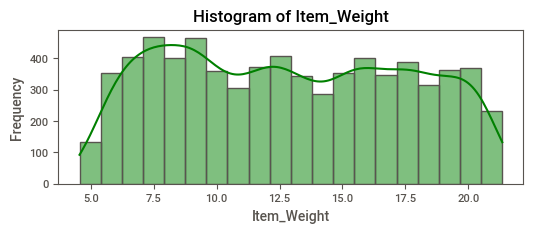

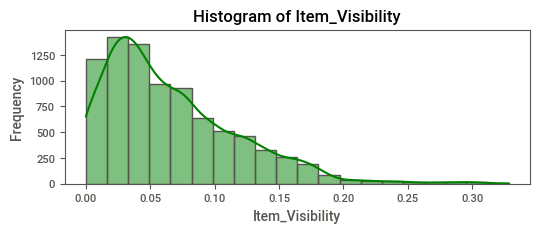

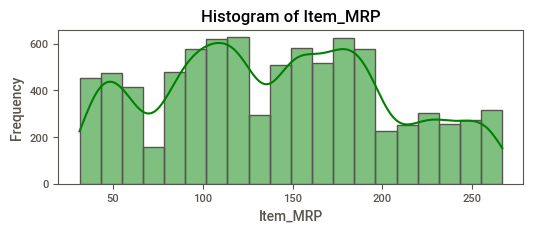

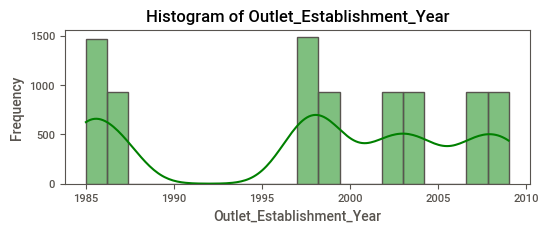

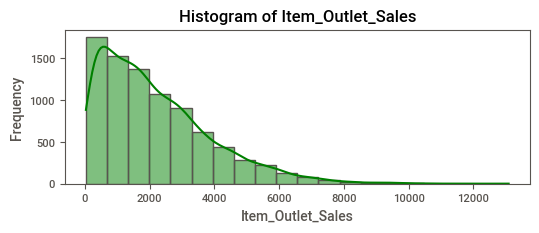

In [93]:
import seaborn as sns

# Create histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(6, 2))
    sns.histplot(trainDf[column], bins=20, kde=True, color='green')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()


## check missing values in dataset

In [94]:
# Check for missing values in each column
missing_values = trainDf.isnull().sum()

# Print the columns with missing values
print(missing_values)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


there are only null values in items weights and the outlite size. other columns dont have any null values



*   List item
there are some strategies for handling missing values.in this dataset we need to fill these missing values. if we remove data , amount of data will be reduce.






##fill missing values in item weight and outlet size

In [95]:
# Fill missing values in 'Item_Weight' with the mean
trainDf['Item_Weight'].fillna(trainDf['Item_Weight'].mean(), inplace=True)

# Fill missing values in 'Outlet_Size' with the mode
trainDf['Outlet_Size'].fillna(trainDf['Outlet_Size'].mode()[0], inplace=True)


In [96]:
missing_values_fill = trainDf.isnull().sum()
print(missing_values_fill)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


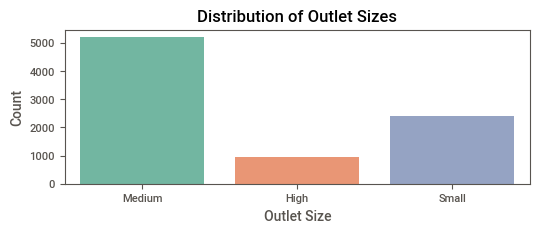

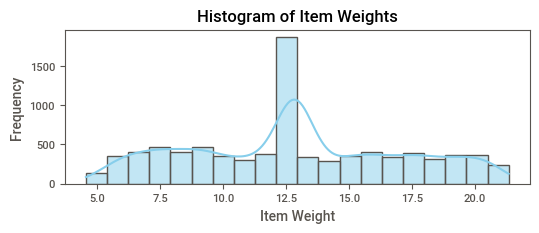

In [97]:
# Create a bar plot for 'Outlet_Size'
plt.figure(figsize=(6, 2))
sns.countplot(data=trainDf, x='Outlet_Size', palette='Set2')
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Distribution of Outlet Sizes')
plt.show()

# Create a histogram for 'Item_Weight'
plt.figure(figsize=(6, 2))
sns.histplot(data=trainDf, x='Item_Weight', bins=20, kde=True, color='skyblue')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Item Weights')
plt.show()


In [98]:
trainDf['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

before filling missing values
* count    7060.000000
* mean       12.857645
* std         4.643456
* min         4.555000
* 25%         8.773750
* 50%        12.600000
* 75%        16.850000
* max        21.350000


In [99]:
trainDf['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

## Find outliers

Item_Weight                     Axes(0.125,0.11;0.133621x0.77)
Item_Visibility              Axes(0.285345,0.11;0.133621x0.77)
Item_MRP                      Axes(0.44569,0.11;0.133621x0.77)
Outlet_Establishment_Year    Axes(0.606034,0.11;0.133621x0.77)
Item_Outlet_Sales            Axes(0.766379,0.11;0.133621x0.77)
dtype: object

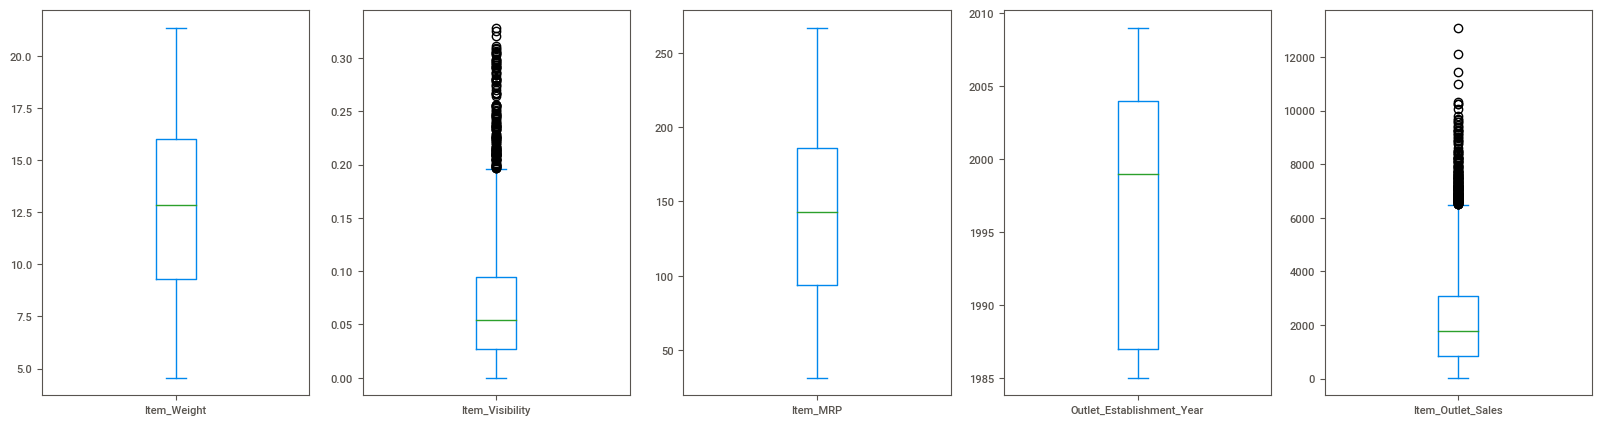

In [100]:
trainDf.plot(kind='box', subplots=True, layout=(1,5), figsize=(20,5))

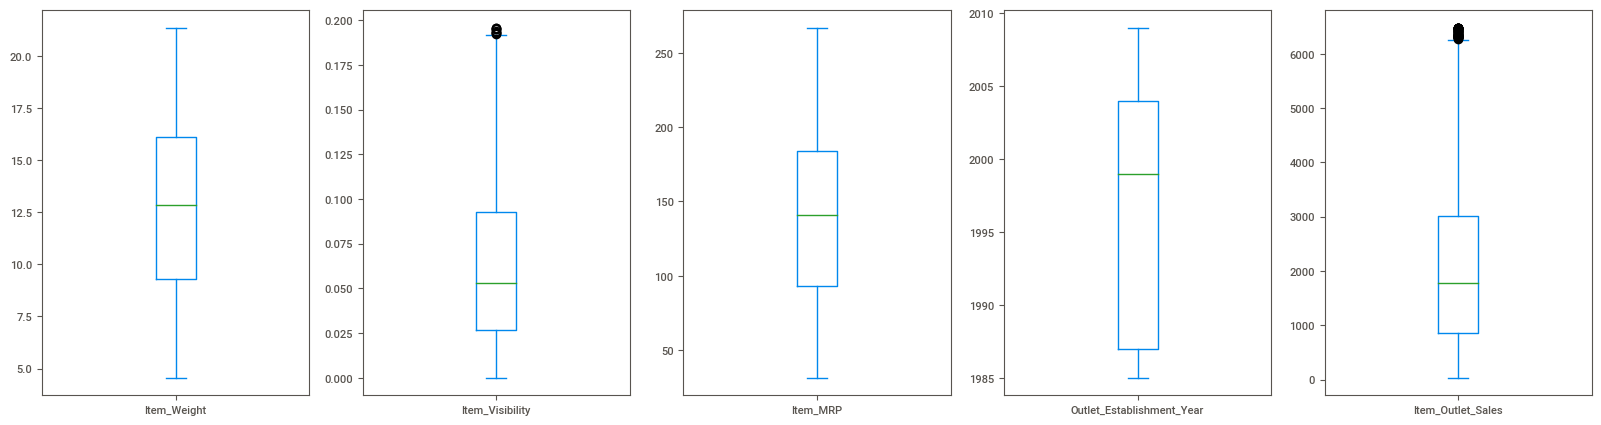

In [101]:
import matplotlib.pyplot as plt
import numpy as np

def remove_outliers(df, column, threshold=1.5):
    q25, q75 = np.percentile(df[column], 25), np.percentile(df[column], 75)
    iqr = q75 - q25
    cut_off = iqr * threshold
    lower, upper = q25 - cut_off, q75 + cut_off

    outliers = (df[column] < lower) | (df[column] > upper)
    df_no_outliers = df[~outliers]

    return df_no_outliers


outliers_to_remove = {
    'Item_Weight': (0.125, 0.11, 0.133621, 0.77),
    'Item_Visibility': (0.285345, 0.11, 0.133621, 0.77),
    'Item_MRP': (0.44569, 0.11, 0.133621, 0.77),
    'Outlet_Establishment_Year': (0.606034, 0.11, 0.133621, 0.77),
    'Item_Outlet_Sales': (0.766379, 0.11, 0.133621, 0.77)
}

# Remove outliers for each column
for column, subplot_params in outliers_to_remove.items():
    trainDf = remove_outliers(trainDf, column)

# Step 2: Visualize the data after removing outliers
trainDf.plot(kind='box', subplots=True, layout=(1, 5), figsize=(20, 5))
plt.show()

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

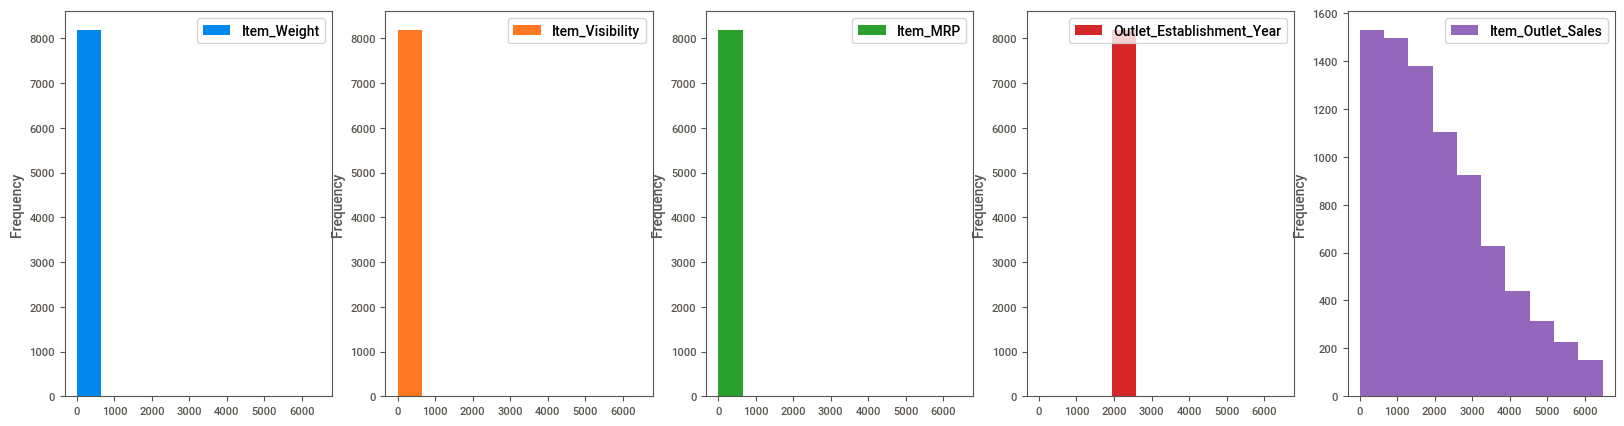

In [102]:
trainDf.plot(kind='hist', subplots=True, layout=(1,5), figsize=(20,5))

In [103]:
trainDf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8193, dtype: bool

In [104]:
trainDf

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [35]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8193 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8193 non-null   object 
 1   Item_Weight                8193 non-null   float64
 2   Item_Fat_Content           8193 non-null   object 
 3   Item_Visibility            8193 non-null   float64
 4   Item_Type                  8193 non-null   object 
 5   Item_MRP                   8193 non-null   float64
 6   Outlet_Identifier          8193 non-null   object 
 7   Outlet_Establishment_Year  8193 non-null   int64  
 8   Outlet_Size                8193 non-null   object 
 9   Outlet_Location_Type       8193 non-null   object 
 10  Outlet_Type                8193 non-null   object 
 11  Item_Outlet_Sales          8193 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 832.1+ KB


In [105]:
trainDf['Item_Fat_Content'].value_counts()

Low Fat    4898
Regular    2769
LF          304
reg         115
low fat     107
Name: Item_Fat_Content, dtype: int64

In [106]:
# Replace the values in the "Item_Fat_Content" column
trainDf['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)

# Verify the changes
item_fat_content_details = trainDf['Item_Fat_Content'].value_counts()
print(item_fat_content_details)


Low Fat    5309
Regular    2884
Name: Item_Fat_Content, dtype: int64


In [107]:
trainDf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Encoding

In [110]:

from sklearn.preprocessing import LabelEncoder

# Selecting only the categorical columns
# categorical_columns = trainDf.select_dtypes(include=['object']).columns

# Using LabelEncoder to encode the categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    trainDf[column] = label_encoder.fit_transform(trainDf[column])

# Display the first few rows of the DataFrame after encoding
trainDf


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [111]:
numerical_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

##Normalize

In [112]:
from sklearn.preprocessing import MinMaxScaler

# Exclude 'Item_Outlet_Sales' from the list of numerical columns
numerical_columns.remove('Item_Outlet_Sales')

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the numerical columns using the scaler
trainDf[numerical_columns] = scaler.fit_transform(trainDf[numerical_columns])
trainDf


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,0.282525,0,0.081991,4,0.927507,9,0.583333,1,0,1,3735.1380
1,8,0.081274,1,0.098498,14,0.072068,3,1.000000,1,2,2,443.4228
2,662,0.770765,0,0.085632,10,0.468288,9,0.583333,1,0,1,2097.2700
3,1121,0.871986,1,0.000000,6,0.640093,0,0.541667,1,2,0,732.3800
4,1297,0.260494,0,0.000000,9,0.095805,1,0.083333,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,0.137541,0,0.290124,13,0.777729,1,0.083333,0,2,1,2778.3834
8519,897,0.227746,1,0.240048,0,0.326263,7,0.708333,1,1,1,549.2850
8520,1357,0.359929,0,0.179778,8,0.228492,6,0.791667,2,1,1,1193.1136
8521,681,0.158083,1,0.741977,13,0.304939,3,1.000000,1,2,2,1845.5976


#**Test data set**

In [154]:
import shutil
shutil.copy("Big-Mart-Sale-Prediction/test_AbJTz2l.csv", "/content")

'/content/test_AbJTz2l.csv'

In [155]:
testDf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,1,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,1,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,1,Tier 2,Supermarket Type1
4,FDY38,0.494727,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [142]:
testDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5559 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5559 non-null   object 
 1   Item_Weight                5559 non-null   float64
 2   Item_Fat_Content           5559 non-null   object 
 3   Item_Visibility            5559 non-null   float64
 4   Item_Type                  5559 non-null   object 
 5   Item_MRP                   5559 non-null   float64
 6   Outlet_Identifier          5559 non-null   object 
 7   Outlet_Establishment_Year  5559 non-null   int64  
 8   Outlet_Size                5559 non-null   object 
 9   Outlet_Location_Type       5559 non-null   object 
 10  Outlet_Type                5559 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 521.2+ KB


We can see in test dataset there are 11 Features. 4 of features are Numerical and others are categorical. Lets explore Categorical and some Neumarical Features for better understand the data set

In [156]:
categorical_columns = list(testDf.select_dtypes(include=['object']).columns)
print('Categorical columns:\n {}'.format(categorical_columns))

numerical_columns = list(testDf.select_dtypes(include=['int64', 'float64']).columns)
print('Numerical columns:\n {}'.format(numerical_columns))

Categorical columns:
 ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numerical columns:
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']


In [144]:
testDf[categorical_columns].head() #categorical features

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,Low Fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1
1,FDW14,Regular,Dairy,OUT017,1,Tier 2,Supermarket Type1
2,NCN55,Low Fat,Others,OUT010,1,Tier 3,Grocery Store
3,FDQ58,Low Fat,Snack Foods,OUT017,1,Tier 2,Supermarket Type1
4,FDY38,Regular,Dairy,OUT027,Medium,Tier 3,Supermarket Type3


In [145]:
print(testDf.nunique()) #Finding unique instances

Item_Identifier              1539
Item_Weight                   410
Item_Fat_Content                2
Item_Visibility              5159
Item_Type                      16
Item_MRP                     4337
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64


In [146]:
testDf['Item_Visibility'].describe()

count    5559.000000
mean        0.061871
std         0.044487
min         0.000000
25%         0.026711
50%         0.052545
75%         0.090051
max         0.185167
Name: Item_Visibility, dtype: float64

In [147]:
testDf['Item_Identifier'].value_counts()

DRF48    8
FDZ50    8
FDP15    8
FDW10    8
FDQ60    8
        ..
FDH33    1
FDD50    1
FDJ09    1
FDG57    1
FDF04    1
Name: Item_Identifier, Length: 1539, dtype: int64

We can see some duplicate items but it may be possible since there are several outlets.

In [152]:
testDf['Item_Fat_Content'].value_counts()

Low Fat    3598
Regular    1961
Name: Item_Fat_Content, dtype: int64

In [149]:
testDf['Item_Type'].value_counts()

Snack Foods              768
Fruits and Vegetables    764
Household                630
Frozen Foods             548
Dairy                    445
Baking Goods             432
Canned                   422
Health and Hygiene       333
Meat                     308
Soft Drinks              276
Breads                   160
Hard Drinks              145
Starchy Foods            119
Others                   109
Breakfast                 75
Seafood                   25
Name: Item_Type, dtype: int64

In [150]:
testDf['Outlet_Identifier'].value_counts()

OUT027    623
OUT049    620
OUT046    620
OUT013    620
OUT035    620
OUT045    619
OUT018    618
OUT017    616
OUT010    309
OUT019    294
Name: Outlet_Identifier, dtype: int64

there are 10 target values

In [151]:
testDf['Outlet_Establishment_Year'].value_counts()

1985    917
1999    620
1997    620
1987    620
2004    620
2002    619
2009    618
2007    616
1998    309
Name: Outlet_Establishment_Year, dtype: int64

In [125]:
testDf['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [126]:
testDf['Outlet_Location_Type'].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

In [127]:
testDf['Outlet_Type'].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

## Numerical features of the test dataset

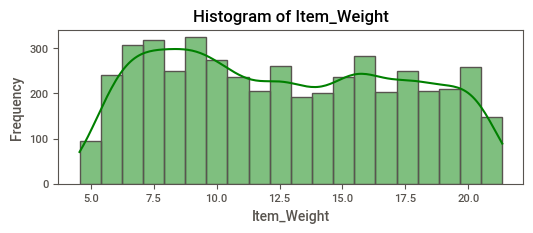

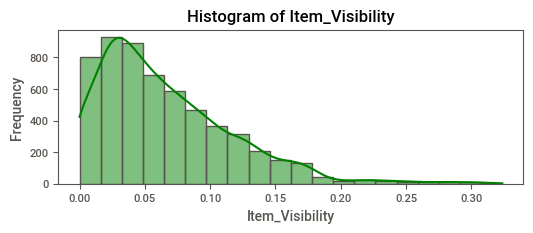

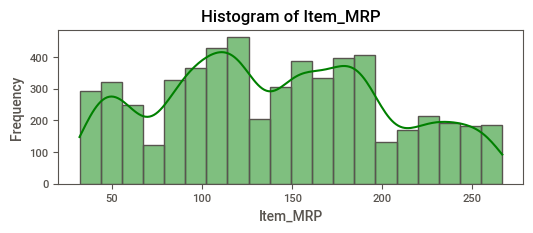

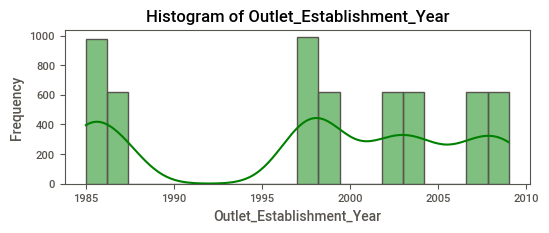

In [128]:
import seaborn as sns

# Create histograms for each numerical column
for column in numerical_columns_1:
    plt.figure(figsize=(6, 2))
    sns.histplot(testDf[column], bins=20, kde=True, color='green')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()


In [129]:
print('Skewness of the distribution of Item_Weight: %f' % testDf['Item_Weight'].skew())
print('Kurtsis of the distribution of Item_Weight: %f' %testDf['Item_Weight'].kurt())

Skewness of the distribution of Item_Weight: 0.129975
Kurtsis of the distribution of Item_Weight: -1.226412


In our analysis, we've observed several noteworthy points. Firstly, the test and train datasets demonstrate a striking resemblance, which is advantageous for developing and evaluating predictive models. This similarity allows us to train a model on one dataset and assess its performance on the other. However, there are certain anomalies in the data that require attention. For instance, the presence of items with zero visibility in the "Item Visibility" attribute is impractical in a retail context, as products must be visible to be sold. Addressing or investigating these data points is crucial for data accuracy. Additionally, the "Outlet Establishment Year" attribute spans from 1985 to 2009, but to better understand its impact on sales, it would be more informative to convert these years into the age of each store. Finally, the lower "count" of values in "Item_Weight" and "Outlet_Size" indicates the presence of missing data, necessitating appropriate handling, such as imputation or data removal, to ensure the dataset's integrity.

#Find Null in TestDf

In [157]:
testDf.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [131]:
testDf['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [160]:
# Replace the values in the "Item_Fat_Content" column
testDf['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)

# Verify the changes
item_fat_content_details = testDf['Item_Fat_Content'].value_counts()
print(item_fat_content_details)

Low Fat    3598
Regular    1961
Name: Item_Fat_Content, dtype: int64


##fill null values

In [133]:
# Fill missing values in 'Item_Weight' with the mean
testDf['Item_Weight'].fillna(trainDf['Item_Weight'].mean(), inplace=True)

# Fill missing values in 'Outlet_Size' with the mode
testDf['Outlet_Size'].fillna(trainDf['Outlet_Size'].mode()[0], inplace=True)

In [134]:
testDf.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [158]:
testDf['Outlet_Size'].describe()

count       5559
unique         4
top       Medium
freq        1861
Name: Outlet_Size, dtype: object

## find and remove outliers

Item_Weight                     Axes(0.125,0.11;0.133621x0.77)
Item_Visibility              Axes(0.285345,0.11;0.133621x0.77)
Item_MRP                      Axes(0.44569,0.11;0.133621x0.77)
Outlet_Establishment_Year    Axes(0.606034,0.11;0.133621x0.77)
dtype: object

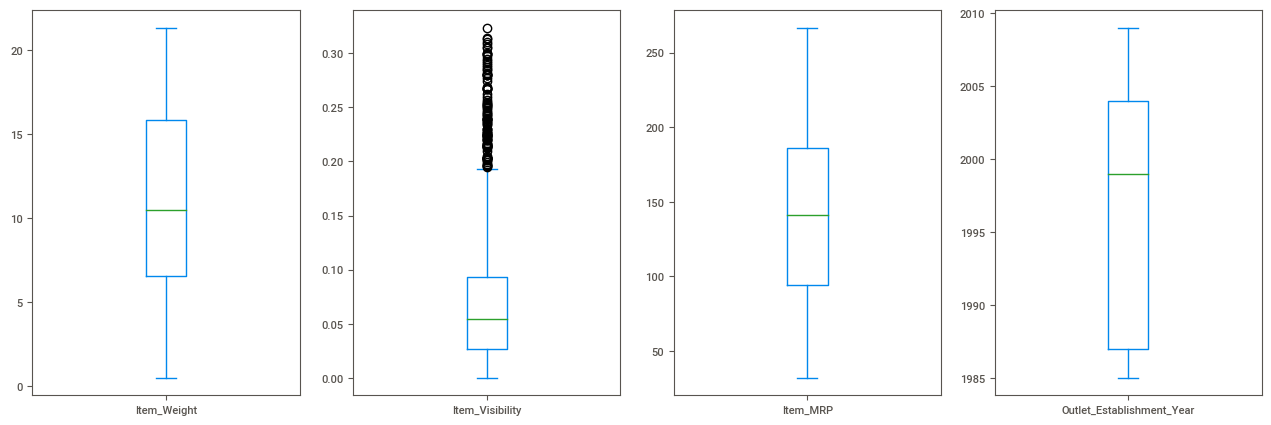

In [136]:
testDf.plot(kind='box', subplots=True, layout=(1,5), figsize=(20,5))

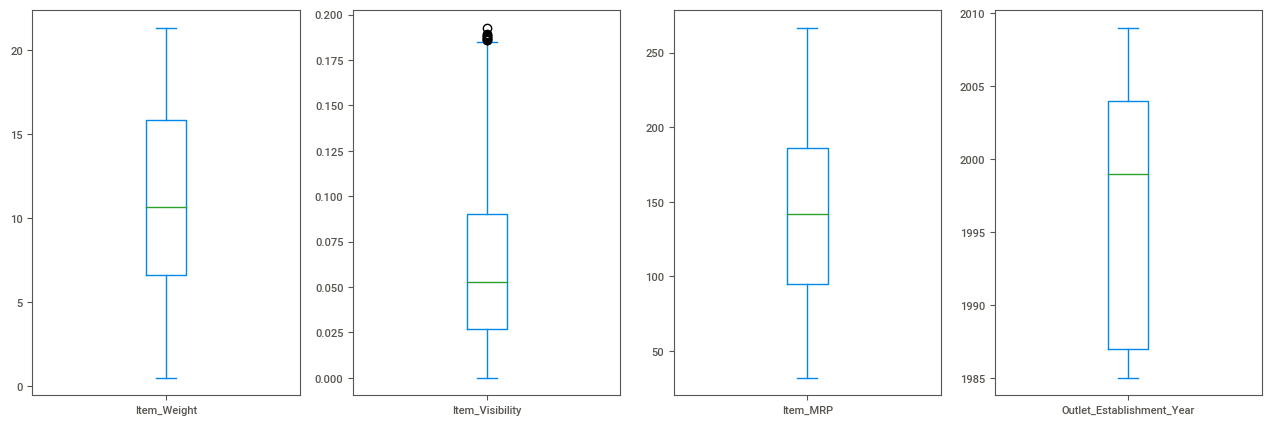

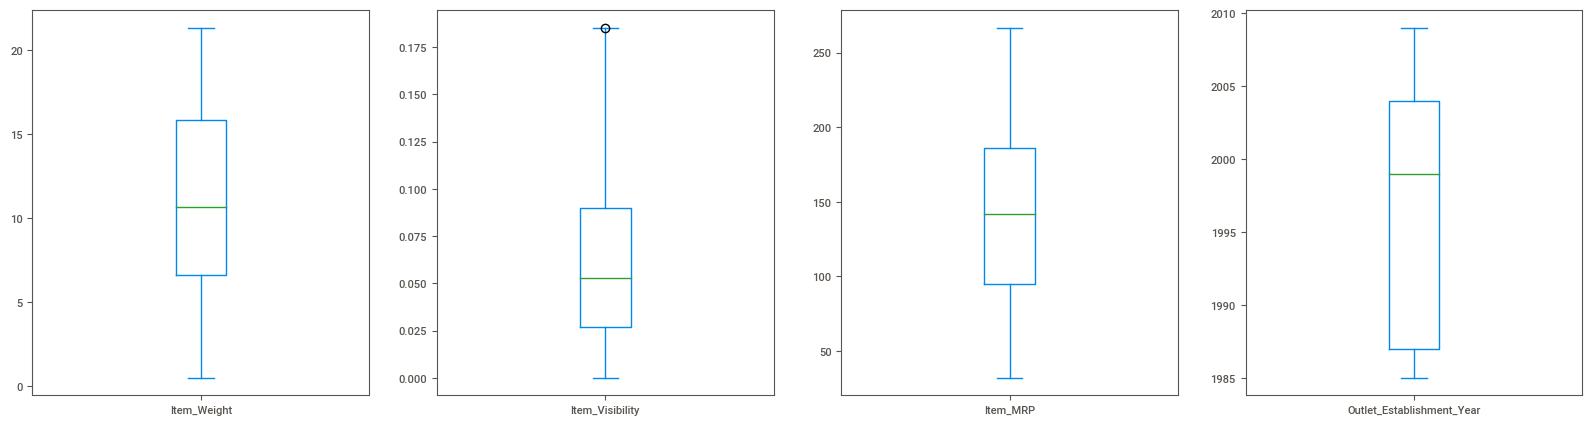

In [137]:
def remove_outliers(df, column, threshold=1.5):
    q25, q75 = np.percentile(df[column], 25), np.percentile(df[column], 75)
    iqr = q75 - q25
    cut_off = iqr * threshold
    lower, upper = q25 - cut_off, q75 + cut_off

    outliers = (df[column] < lower) | (df[column] > upper)
    df_no_outliers = df[~outliers]

    return df_no_outliers


outliers_to_remove = {
    'Item_Weight': (0.125, 0.11, 0.133621, 0.77),
    'Item_Visibility': (0.285345, 0.11, 0.133621, 0.77),
    'Item_MRP': (0.44569, 0.11, 0.133621, 0.77),
    'Outlet_Establishment_Year': (0.606034, 0.11, 0.133621, 0.77),

}

# Remove outliers for each column in trainDf
for column, subplot_params in outliers_to_remove.items():
    testDf = remove_outliers(testDf, column)

# Visualize the data after removing outliers in trainDf
testDf.plot(kind='box', subplots=True, layout=(1, 5), figsize=(20, 5))
plt.show()

# Remove outliers for each column in testDf
for column, subplot_params in outliers_to_remove.items():
    testDf = remove_outliers(testDf, column)

# Visualize the data after removing outliers in testDf
testDf.plot(kind='box', subplots=True, layout=(1, 4), figsize=(20, 5))
plt.show()


In [138]:
testDf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Length: 5559, dtype: bool

In [161]:
testDf

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,1,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,1,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,1,Tier 2,Supermarket Type1
4,FDY38,0.494727,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,1,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,1,Tier 2,Supermarket Type1


##Encoding

In [162]:
from sklearn.preprocessing import LabelEncoder

# Ensuring all values are treated as strings
testDf[categorical_columns] = testDf[categorical_columns].astype(str)

# Encode each categorical column in testDf
label_encoder = LabelEncoder()
for column in categorical_columns:
    testDf[column] = label_encoder.fit_transform(testDf[column])

# Display the first few rows of the DataFrame after encoding
testDf.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1099,20.750000,0,0.007565,13,107.8622,9,1999,2,0,1
1,1063,8.300000,1,0.038428,4,87.3198,2,2007,0,1,1
2,1402,14.600000,0,0.099575,11,241.7538,0,1998,0,2,0
3,808,7.315000,0,0.015388,13,155.0340,2,2007,0,1,1
4,1180,0.494727,1,0.118599,4,234.2300,5,1985,2,2,3


##Normalize

In [163]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()


# Apply Min-Max normalization to the numerical columns
testDf[numerical_columns] = scaler.fit_transform(testDf[numerical_columns])

# Display the first few rows of the DataFrame after normalization
testDf.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1099,0.971230,0,0.040854,13,0.323413,9,0.583333,2,0,1
1,1063,0.374259,1,0.207530,4,0.235849,2,0.916667,0,1,1
2,1402,0.676341,0,0.537758,11,0.894140,0,0.541667,0,2,0
3,808,0.327029,0,0.083106,13,0.524488,2,0.916667,0,1,1
4,1180,0.000000,1,0.640500,4,0.862069,5,0.000000,2,2,3


#Model training

In [164]:
trainDf

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,0.282525,0,0.081991,4,0.927507,9,0.583333,1,0,1,3735.1380
1,8,0.081274,1,0.098498,14,0.072068,3,1.000000,1,2,2,443.4228
2,662,0.770765,0,0.085632,10,0.468288,9,0.583333,1,0,1,2097.2700
3,1121,0.871986,1,0.000000,6,0.640093,0,0.541667,1,2,0,732.3800
4,1297,0.260494,0,0.000000,9,0.095805,1,0.083333,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,0.137541,0,0.290124,13,0.777729,1,0.083333,0,2,1,2778.3834
8519,897,0.227746,1,0.240048,0,0.326263,7,0.708333,1,1,1,549.2850
8520,1357,0.359929,0,0.179778,8,0.228492,6,0.791667,2,1,1,1193.1136
8521,681,0.158083,1,0.741977,13,0.304939,3,1.000000,1,2,2,1845.5976


In [165]:
testDf

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1099,0.971230,0,0.040854,13,0.323413,9,0.583333,2,0,1
1,1063,0.374259,1,0.207530,4,0.235849,2,0.916667,0,1,1
2,1402,0.676341,0,0.537758,11,0.894140,0,0.541667,0,2,0
3,808,0.327029,0,0.083106,13,0.524488,2,0.916667,0,1,1
4,1180,0.000000,1,0.640500,4,0.862069,5,0.000000,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,0.479748,1,0.072888,13,0.466011,8,0.500000,3,0,1
5677,306,0.340694,1,0.772227,15,0.584637,3,1.000000,2,2,2
5678,1408,0.455773,0,0.397094,8,0.369798,7,0.708333,0,1,1
5679,517,0.709906,1,0.000000,3,0.778487,2,0.916667,0,1,1


##Linear Regression

In [167]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Features (X) and Target (y)
X = trainDf.drop('Item_Outlet_Sales', axis=1)
y = trainDf['Item_Outlet_Sales']

# Linear Regression model
model = LinearRegression()

# Define the cross-validation strategy (5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and evaluate the model
cv_results = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Calculate RMSE, MSE, and MAE from cross-validation results
rmse_cv = np.sqrt(-cv_results.mean())
mse_cv = -cv_results.mean()
mae_cv = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()

# Display the cross-validation results
print(f'Cross-Validation Results (Negative Mean Squared Error): {cv_results}')
print(f'Mean RMSE: {rmse_cv}')
print(f'Mean MSE: {mse_cv}')
print(f'Mean MAE: {mae_cv}')

# You can also fit the model on the entire dataset if you want
model.fit(X, y)

# If you want to make predictions on the training data
y_pred = model.predict(X)

# Calculate training set metrics
mse_train = mean_squared_error(y, y_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y, y_pred)

print(f'Training Set Metrics:')
print(f'MSE: {mse_train}')
print(f'RMSE: {rmse_train}')
print(f'MAE: {mae_train}')


Cross-Validation Results (Negative Mean Squared Error): [-1231633.09992969 -1119841.30319488 -1197206.03222574 -1072835.89889305
 -1147468.48123054]
Mean RMSE: 1074.1494137664367
Mean MSE: 1153796.9630947798
Mean MAE: 830.338254003357
Training Set Metrics:
MSE: 1150935.4892922053
RMSE: 1072.8166149404126
MAE: 829.2184512893193


#Random forest regression n = 100

In [168]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Features (X) and Target (y)
X = trainDf.drop('Item_Outlet_Sales', axis=1)
y = trainDf['Item_Outlet_Sales']

# Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Define the cross-validation strategy (5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and evaluate the Random Forest model
cv_results_rf = cross_val_score(rf_model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Calculate RMSE, MSE, and MAE from cross-validation results for Random Forest
rmse_cv_rf = np.sqrt(-cv_results_rf.mean())
mse_cv_rf = -cv_results_rf.mean()
mae_cv_rf = -cross_val_score(rf_model, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()

# Display the cross-validation results for Random Forest
print(f'Random Forest Cross-Validation Results (Negative Mean Squared Error): {cv_results_rf}')
print(f'Mean RMSE for Random Forest: {rmse_cv_rf}')
print(f'Mean MSE for Random Forest: {mse_cv_rf}')
print(f'Mean MAE for Random Forest: {mae_cv_rf}')

# You can also fit the Random Forest model on the entire dataset if you want
rf_model.fit(X, y)

# If you want to make predictions on the training data
y_pred_rf = rf_model.predict(X)

# Calculate training set metrics for Random Forest
mse_train_rf = mean_squared_error(y, y_pred_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
mae_train_rf = mean_absolute_error(y, y_pred_rf)

print(f'Random Forest Training Set Metrics:')
print(f'MSE: {mse_train_rf}')
print(f'RMSE: {rmse_train_rf}')
print(f'MAE: {mae_train_rf}')


Random Forest Cross-Validation Results (Negative Mean Squared Error): [-1115226.68249699 -1021928.42331658 -1095091.28731842 -1007927.28113529
 -1038093.60767298]
Mean RMSE for Random Forest: 1027.4499775600043
Mean MSE for Random Forest: 1055653.4563880533
Mean MAE for Random Forest: 745.6934460988695
Random Forest Training Set Metrics:
MSE: 148365.6710650666
RMSE: 385.18264637061026
MAE: 276.78003086830216


#Random forest regression n = 50

In [169]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Features (X) and Target (y)
X = trainDf.drop('Item_Outlet_Sales', axis=1)
y = trainDf['Item_Outlet_Sales']

# Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)

# Define the cross-validation strategy (5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and evaluate the Random Forest model
cv_results_rf = cross_val_score(rf_model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Calculate RMSE, MSE, and MAE from cross-validation results for Random Forest
rmse_cv_rf = np.sqrt(-cv_results_rf.mean())
mse_cv_rf = -cv_results_rf.mean()
mae_cv_rf = -cross_val_score(rf_model, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()

# Display the cross-validation results for Random Forest
print(f'Random Forest Cross-Validation Results (Negative Mean Squared Error): {cv_results_rf}')
print(f'Mean RMSE for Random Forest: {rmse_cv_rf}')
print(f'Mean MSE for Random Forest: {mse_cv_rf}')
print(f'Mean MAE for Random Forest: {mae_cv_rf}')

# You can also fit the Random Forest model on the entire dataset if you want
rf_model.fit(X, y)

# If you want to make predictions on the training data
y_pred_rf = rf_model.predict(X)

# Calculate training set metrics for Random Forest
mse_train_rf = mean_squared_error(y, y_pred_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
mae_train_rf = mean_absolute_error(y, y_pred_rf)

print(f'Random Forest Training Set Metrics:')
print(f'MSE: {mse_train_rf}')
print(f'RMSE: {rmse_train_rf}')
print(f'MAE: {mae_train_rf}')


Random Forest Cross-Validation Results (Negative Mean Squared Error): [-1116767.18283087 -1033143.70947763 -1103759.5140999  -1021688.80413729
 -1040959.07702623]
Mean RMSE for Random Forest: 1031.1467681733695
Mean MSE for Random Forest: 1063263.6575143845
Mean MAE for Random Forest: 747.3590141184712
Random Forest Training Set Metrics:
MSE: 154294.4877871721
RMSE: 392.80337038672684
MAE: 279.72010550079335


#Supprt Vector Regression

In [170]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Features (X) and Target (y)
X = trainDf.drop('Item_Outlet_Sales', axis=1)
y = trainDf['Item_Outlet_Sales']

# SVR model with a pipeline that includes standardization
svr_model = make_pipeline(StandardScaler(), SVR())

# Define the cross-validation strategy (5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and evaluate the SVR model
cv_results_svr = cross_val_score(svr_model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Calculate RMSE, MSE, and MAE from cross-validation results for SVR
rmse_cv_svr = np.sqrt(-cv_results_svr.mean())
mse_cv_svr = -cv_results_svr.mean()
mae_cv_svr = -cross_val_score(svr_model, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()

# Display the cross-validation results for SVR
print(f'SVR Cross-Validation Results (Negative Mean Squared Error): {cv_results_svr}')
print(f'Mean RMSE for SVR: {rmse_cv_svr}')
print(f'Mean MSE for SVR: {mse_cv_svr}')
print(f'Mean MAE for SVR: {mae_cv_svr}')

# You can also fit the SVR model on the entire dataset if you want
svr_model.fit(X, y)

# If you want to make predictions on the training data
y_pred_svr = svr_model.predict(X)

# Calculate training set metrics for SVR
mse_train_svr = mean_squared_error(y, y_pred_svr)
rmse_train_svr = np.sqrt(mse_train_svr)
mae_train_svr = mean_absolute_error(y, y_pred_svr)

print(f'SVR Training Set Metrics:')
print(f'MSE: {mse_train_svr}')
print(f'RMSE: {rmse_train_svr}')
print(f'MAE: {mae_train_svr}')


SVR Cross-Validation Results (Negative Mean Squared Error): [-2237884.96449923 -2086347.69486621 -2043285.03172503 -2121162.70398294
 -2147687.7512884 ]
Mean RMSE for SVR: 1458.51761363117
Mean MSE for SVR: 2127273.629272363
Mean MAE for SVR: 1137.898075244386
SVR Training Set Metrics:
MSE: 2074448.095646659
RMSE: 1440.2944475511454
MAE: 1121.6283334065977


#XGBoost Regression

In [171]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Features (X) and Target (y)
X = trainDf.drop('Item_Outlet_Sales', axis=1)
y = trainDf['Item_Outlet_Sales']

# XGBoost Regression model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Define the cross-validation strategy (5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and evaluate the XGBoost model
cv_results_xgb = cross_val_score(xgb_model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Calculate RMSE, MSE, and MAE from cross-validation results for XGBoost
rmse_cv_xgb = np.sqrt(-cv_results_xgb.mean())
mse_cv_xgb = -cv_results_xgb.mean()
mae_cv_xgb = -cross_val_score(xgb_model, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()

# Display the cross-validation results for XGBoost
print(f'XGBoost Cross-Validation Results (Negative Mean Squared Error): {cv_results_xgb}')
print(f'Mean RMSE for XGBoost: {rmse_cv_xgb}')
print(f'Mean MSE for XGBoost: {mse_cv_xgb}')
print(f'Mean MAE for XGBoost: {mae_cv_xgb}')

# You can also fit the XGBoost model on the entire dataset if you want
xgb_model.fit(X, y)

# If you want to make predictions on the training data
y_pred_xgb = xgb_model.predict(X)

# Calculate training set metrics for XGBoost
mse_train_xgb = mean_squared_error(y, y_pred_xgb)
rmse_train_xgb = np.sqrt(mse_train_xgb)
mae_train_xgb = mean_absolute_error(y, y_pred_xgb)

print(f'XGBoost Training Set Metrics:')
print(f'MSE: {mse_train_xgb}')
print(f'RMSE: {rmse_train_xgb}')
print(f'MAE: {mae_train_xgb}')


XGBoost Cross-Validation Results (Negative Mean Squared Error): [-1254039.43210093 -1147405.48073045 -1151542.09492375 -1097425.42691722
 -1142869.295649  ]
Mean RMSE for XGBoost: 1076.409005008909
Mean MSE for XGBoost: 1158656.3460642695
Mean MAE for XGBoost: 785.2919535629923
XGBoost Training Set Metrics:
MSE: 360633.0540417817
RMSE: 600.5273133187047
MAE: 439.38746268727016


#CatBoost Regression

In [173]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.0 MB/s eta 0:00:00


In [180]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Features (X) and Target (y)
X = trainDf.drop('Item_Outlet_Sales', axis=1)
y = trainDf['Item_Outlet_Sales']

# CatBoost Regression model
catboost_model = CatBoostRegressor(iterations=100, random_state=42)

# Define the cross-validation strategy (5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and evaluate the CatBoost model
cv_results_catboost = cross_val_score(catboost_model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Calculate RMSE, MSE, and MAE from cross-validation results for CatBoost
rmse_cv_catboost = np.sqrt(-cv_results_catboost.mean())
mse_cv_catboost = -cv_results_catboost.mean()
mae_cv_catboost = -cross_val_score(catboost_model, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()

# Display the cross-validation results for CatBoost
print(f'CatBoost Cross-Validation Results (Negative Mean Squared Error): {cv_results_catboost}')
print(f'Mean RMSE for CatBoost: {rmse_cv_catboost}')
print(f'Mean MSE for CatBoost: {mse_cv_catboost}')
print(f'Mean MAE for CatBoost: {mae_cv_catboost}')

# You can also fit the CatBoost model on the entire dataset if you want
catboost_model.fit(X, y)

# If you want to make predictions on the training data
y_pred_catboost = catboost_model.predict(X)

# Calculate training set metrics for CatBoost
mse_train_catboost = mean_squared_error(y, y_pred_catboost)
rmse_train_catboost = np.sqrt(mse_train_catboost)
mae_train_catboost = mean_absolute_error(y, y_pred_catboost)

print(f'CatBoost Training Set Metrics:')
print(f'MSE: {mse_train_catboost}')
print(f'RMSE: {rmse_train_catboost}')
print(f'MAE: {mae_train_catboost}')


Learning rate set to 0.358251
0:	learn: 1241.8422371	total: 4.09ms	remaining: 405ms
1:	learn: 1108.6280522	total: 6.63ms	remaining: 325ms
2:	learn: 1036.6709399	total: 8.87ms	remaining: 287ms
3:	learn: 998.6590344	total: 11.1ms	remaining: 266ms
4:	learn: 978.7693223	total: 13.3ms	remaining: 253ms
5:	learn: 970.6804487	total: 15.5ms	remaining: 243ms
6:	learn: 965.7346612	total: 17.7ms	remaining: 235ms
7:	learn: 961.4121200	total: 19.9ms	remaining: 229ms
8:	learn: 958.7171286	total: 22.1ms	remaining: 224ms
9:	learn: 956.0419053	total: 24.7ms	remaining: 222ms
10:	learn: 952.9450287	total: 26.9ms	remaining: 218ms
11:	learn: 949.4179494	total: 29.2ms	remaining: 214ms
12:	learn: 945.9138733	total: 31.4ms	remaining: 210ms
13:	learn: 944.1682863	total: 33.9ms	remaining: 208ms
14:	learn: 942.3340111	total: 36.4ms	remaining: 206ms
15:	learn: 941.2618456	total: 39ms	remaining: 205ms
16:	learn: 939.4551646	total: 41.4ms	remaining: 202ms
17:	learn: 936.5503563	total: 43.9ms	remaining: 200ms
18:	lea

#KNN regression

In [175]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Features (X) and Target (y)
X = trainDf.drop('Item_Outlet_Sales', axis=1)
y = trainDf['Item_Outlet_Sales']

# KNN Regression model with a pipeline that includes standardization
knn_model = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5))

# Define the cross-validation strategy (5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and evaluate the KNN model
cv_results_knn = cross_val_score(knn_model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Calculate RMSE, MSE, and MAE from cross-validation results for KNN
rmse_cv_knn = np.sqrt(-cv_results_knn.mean())
mse_cv_knn = -cv_results_knn.mean()
mae_cv_knn = -cross_val_score(knn_model, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()

# Display the cross-validation results for KNN
print(f'KNN Cross-Validation Results (Negative Mean Squared Error): {cv_results_knn}')
print(f'Mean RMSE for KNN: {rmse_cv_knn}')
print(f'Mean MSE for KNN: {mse_cv_knn}')
print(f'Mean MAE for KNN: {mae_cv_knn}')

# You can also fit the KNN model on the entire dataset if you want
knn_model.fit(X, y)

# If you want to make predictions on the training data
y_pred_knn = knn_model.predict(X)

# Calculate training set metrics for KNN
mse_train_knn = mean_squared_error(y, y_pred_knn)
rmse_train_knn = np.sqrt(mse_train_knn)
mae_train_knn = mean_absolute_error(y, y_pred_knn)

print(f'KNN Training Set Metrics:')
print(f'MSE: {mse_train_knn}')
print(f'RMSE: {rmse_train_knn}')
print(f'MAE: {mae_train_knn}')


KNN Cross-Validation Results (Negative Mean Squared Error): [-1238348.70777229 -1115557.74537013 -1183504.04931576 -1084496.41348354
 -1137481.03403118]
Mean RMSE for KNN: 1073.2556032905586
Mean MSE for KNN: 1151877.5899945807
Mean MAE for KNN: 789.6752180335428
KNN Training Set Metrics:
MSE: 767251.5283305258
RMSE: 875.9289516453523
MAE: 641.5374776125961


#predict the sales by catboost model in test dataset

In [184]:
testDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5559 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Item_Identifier              5559 non-null   int64  
 1   Item_Weight                  5559 non-null   float64
 2   Item_Fat_Content             5559 non-null   int64  
 3   Item_Visibility              5559 non-null   float64
 4   Item_Type                    5559 non-null   int64  
 5   Item_MRP                     5559 non-null   float64
 6   Outlet_Identifier            5559 non-null   int64  
 7   Outlet_Establishment_Year    5559 non-null   float64
 8   Outlet_Size                  5559 non-null   int64  
 9   Outlet_Location_Type         5559 non-null   int64  
 10  Outlet_Type                  5559 non-null   int64  
 11  Item_Outlet_Sales            5559 non-null   float64
 12  Predicted_Item_Outlet_Sales  5559 non-null   float64
dtypes: float64(6), int

In [186]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


columns_to_drop = ['Item_Outlet_Sales', 'Predicted_Item_Outlet_Sales']

X_test = testDf.drop(columns=columns_to_drop)



# CatBoost Regression model with a pipeline that includes standardization
catboost_model = make_pipeline(StandardScaler(), CatBoostRegressor(iterations=100, random_state=42))  # You can adjust the number of iterations as needed

# Fit the CatBoost model on the entire training dataset
catboost_model.fit(X, y)

# Predict Item_Outlet_Sales for the test data
predictions_test = catboost_model.predict(X_test)

# Add the predicted values as a new column in the test data
testDf['Predicted_Item_Outlet_Sales'] = predictions_test

# Display the test data with the predicted values
print(testDf[['Item_Identifier', 'Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type', 'Predicted_Item_Outlet_Sales']])

# If you want to save the predictions to a CSV file
testDf.to_csv('predictions.csv', index=False)  # Adjust the filename as needed


Learning rate set to 0.371111
0:	learn: 1232.6445513	total: 2.92ms	remaining: 289ms
1:	learn: 1098.0102453	total: 5.51ms	remaining: 270ms
2:	learn: 1031.8271541	total: 8.04ms	remaining: 260ms
3:	learn: 996.7759260	total: 10.6ms	remaining: 254ms
4:	learn: 980.4265113	total: 13ms	remaining: 247ms
5:	learn: 974.1861507	total: 15.8ms	remaining: 247ms
6:	learn: 969.7599458	total: 18.8ms	remaining: 250ms
7:	learn: 966.0981056	total: 21.5ms	remaining: 247ms
8:	learn: 963.6858258	total: 24.2ms	remaining: 245ms
9:	learn: 962.0665163	total: 26.6ms	remaining: 239ms
10:	learn: 961.7119045	total: 28.1ms	remaining: 228ms
11:	learn: 958.8045383	total: 30.9ms	remaining: 227ms
12:	learn: 957.4193025	total: 33.9ms	remaining: 227ms
13:	learn: 955.1968693	total: 36.6ms	remaining: 225ms
14:	learn: 953.2637042	total: 39.5ms	remaining: 224ms
15:	learn: 951.5784273	total: 42ms	remaining: 221ms
16:	learn: 950.6549888	total: 44.4ms	remaining: 217ms
17:	learn: 949.6030122	total: 47.6ms	remaining: 217ms
18:	learn

In [190]:
testDf

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Predicted_Item_Outlet_Sales
0,1099,0.971230,0,0.040854,13,0.323413,9,0.583333,2,0,1,1463.038002,1463.038002
1,1063,0.374259,1,0.207530,4,0.235849,2,0.916667,0,1,1,1332.658514,1332.658514
2,1402,0.676341,0,0.537758,11,0.894140,0,0.541667,0,2,0,1308.987951,1308.987951
3,808,0.327029,0,0.083106,13,0.524488,2,0.916667,0,1,1,2744.282990,2744.282990
4,1180,0.000000,1,0.640500,4,0.862069,5,0.000000,2,2,3,4166.605557,4166.605557
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,231,0.479748,1,0.072888,13,0.466011,8,0.500000,3,0,1,2020.330093,2020.330093
5677,306,0.340694,1,0.772227,15,0.584637,3,1.000000,2,2,2,2655.665772,2655.665772
5678,1408,0.455773,0,0.397094,8,0.369798,7,0.708333,0,1,1,1823.121307,1823.121307
5679,517,0.709906,1,0.000000,3,0.778487,2,0.916667,0,1,1,3325.073509,3325.073509


In [191]:
column_to_drop = 'Predicted_Item_Outlet_Sales'

# Drop the specified column from testDf
testDf = testDf.drop(columns=[column_to_drop])

In [192]:
testDf

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1099,0.971230,0,0.040854,13,0.323413,9,0.583333,2,0,1,1463.038002
1,1063,0.374259,1,0.207530,4,0.235849,2,0.916667,0,1,1,1332.658514
2,1402,0.676341,0,0.537758,11,0.894140,0,0.541667,0,2,0,1308.987951
3,808,0.327029,0,0.083106,13,0.524488,2,0.916667,0,1,1,2744.282990
4,1180,0.000000,1,0.640500,4,0.862069,5,0.000000,2,2,3,4166.605557
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,231,0.479748,1,0.072888,13,0.466011,8,0.500000,3,0,1,2020.330093
5677,306,0.340694,1,0.772227,15,0.584637,3,1.000000,2,2,2,2655.665772
5678,1408,0.455773,0,0.397094,8,0.369798,7,0.708333,0,1,1,1823.121307
5679,517,0.709906,1,0.000000,3,0.778487,2,0.916667,0,1,1,3325.073509


In [193]:
testDf.to_csv('testDf_predicted.csv', index=False)